# MEESHO ECOMMERCE SALES

# Imported Libraries


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [12]:
df = pd.read_csv(r"C:\Users\mythr\Data&analysis\meesho_data.csv")

In [14]:
df

,scrape_date,product_name,price,original_price,discount_percentage,category,product_url,rating,review_count,seller_name,gender,size,state,city,quantity
0,2024-04-05,W Pink Tie-Dye Linen Saree,2805.78,5195.89,46,Clothing,https://www.meesho.com/product/102853,4.8,160,Ultra Shop,Women,Free Size,Gujarat,Vadodara,2
1,2024-04-05,Biba Grey Striped Chiffon Jeans,785.39,2454.34,68,Clothing,https://www.meesho.com/product/958968,4.4,89,Desi Em,Unisex,L,Kerala,Thiruvananthapuram,1
2,2024-04-05,Mitera Pink Polka Dot Linen Shirt,616.49,708.61,13,Clothing,https://www.meesho.com/product/181748,4.5,299,Royal Bazaar,Women,L,Gujarat,Vadodara,1
3,2024-04-05,Libas Grey Cushion Cover,228.53,341.09,33,Home & Kitchen,https://www.meesho.com/product/401052,3.9,5,Modern Shop,Unisex,Standard,West Bengal,Darjeeling,3
4,2024-04-05,Aurelia Yellow Sandals,540.18,666.89,19,Footwear,https://www.meesho.com/product/987216,4.7,95,Mega Traders,Men,10,Punjab,Amritsar,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2025-04-02,Biba Navy Polka Dot Linen Shorts,264.79,322.91,18,Clothing,https://www.meesho.com/product/774804,3.2,35,Ultra Em,Men,M,Gujarat,Vadodara,1
1196,2025-04-02,Mitera Grey Face Mask,295.84,484.98,39,Beauty,https://www.meesho.com/product/296356,4.0,136,Desi Shop,Women,Standard,Karnataka,Mysore,3
1197,2025-04-02,Libas Black Floral Georgette Lehenga,2433.59,4867.18,50,Clothing,https://www.meesho.com/product/589686,1.7,27,Super Retail,Women,XS,Gujarat,Vadodara,1
1198,2025-04-03,Aahwan Grey Checkered Silk Dupatta,584.26,1718.41,66,Clothing,https://www.meesho.com/product/846848,4.2,40,Super Garments,Women,Free Size,Gujarat,Vadodara,7


# Overview

In [10]:
df.head(5)

,scrape_date,product_name,price,original_price,discount_percentage,category,product_url,rating,review_count,seller_name,gender,size,state,city,quantity,total_price
0,2024-04-06,Sangria Orange Necklace,447.96,605.35,26,Accessories,https://www.meesho.com/product/208185,3.1,95,Super Garments,Female,One Size,Maharashtra,Mumbai,8,3583.68
1,2024-04-06,Aurelia Yellow Printed Georgette Shorts,911.27,1360.10,33,Clothing,https://www.meesho.com/product/648904,3.5,61,Super Textiles,Female,M,Tamil Nadu,Chennai,2,1822.54
2,2024-04-07,Libas Red Embroidered Linen Palazzo,198.35,336.19,41,Clothing,https://www.meesho.com/product/756972,5.0,371,Ultra Textiles,Female,L,Maharashtra,Pune,1,198.35
3,2024-04-07,Biba Purple Embroidered Polyester Jacket,250.52,695.89,64,Clothing,https://www.meesho.com/product/374312,3.8,12,Royal Traders,Unisex,L,Tamil Nadu,Tiruchirappalli,2,501.04
4,2024-04-08,Mitera Yellow Tie-Dye Silk Kurti,814.75,1314.11,38,Clothing,https://www.meesho.com/product/459731,3.4,30,Ultra Em,Female,XL,Rajasthan,Bikaner,8,6518.00


In [11]:
df.tail(5)

,scrape_date,product_name,price,original_price,discount_percentage,category,product_url,rating,review_count,seller_name,gender,size,state,city,quantity,total_price
1195,2025-04-06,Fabindia White Striped Denim Saree,2669.82,3760.31,29,Clothing,https://www.meesho.com/product/171678,5.0,357,Modern Emporium,Female,S,Punjab,Hoshiarpur,2,5339.64
1196,2025-04-06,Mitera Maroon Printed Polyester Kurta,835.57,2532.03,67,Clothing,https://www.meesho.com/product/339574,3.7,74,Elite Em,Female,S,Delhi,New Delhi,1,835.57
1197,2025-04-06,Varanga Orange Checkered Cotton Trousers,516.56,607.72,15,Clothing,https://www.meesho.com/product/108214,4.2,70,Prime Shop,Unisex,XL,Maharashtra,Nagpur,1,516.56
1198,2025-04-06,Aahwan Blue Heels,658.59,723.73,9,Footwear,https://www.meesho.com/product/510040,4.1,147,Mega Retail,Unisex,7,West Bengal,Asansol,1,658.59
1199,2025-04-06,Varanga Grey Floral Polyester Dress,1435.09,2517.70,43,Clothing,https://www.meesho.com/product/643557,2.3,25,Indian Textiles,Female,L,Gujarat,Vadodara,8,11480.72


In [12]:
df.size

19200

In [13]:
df.shape

(1200, 16)

In [14]:
df.dtypes

scrape_date             object
product_name            object
price                  float64
original_price         float64
discount_percentage      int64
category                object
product_url             object
rating                 float64
review_count             int64
seller_name             object
gender                  object
size                    object
state                   object
city                    object
quantity                 int64
total_price            float64
dtype: object

In [15]:
df.columns

Index(['scrape_date', 'product_name', 'price', 'original_price',
       'discount_percentage', 'category', 'product_url', 'rating',
       'review_count', 'seller_name', 'gender', 'size', 'state', 'city',
       'quantity', 'total_price'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   scrape_date          1200 non-null   object 
 1   product_name         1200 non-null   object 
 2   price                1200 non-null   float64
 3   original_price       1200 non-null   float64
 4   discount_percentage  1200 non-null   int64  
 5   category             1200 non-null   object 
 6   product_url          1200 non-null   object 
 7   rating               1200 non-null   float64
 8   review_count         1200 non-null   int64  
 9   seller_name          1200 non-null   object 
 10  gender               1200 non-null   object 
 11  size                 1200 non-null   object 
 12  state                1200 non-null   object 
 13  city                 1200 non-null   object 
 14  quantity             1200 non-null   int64  
 15  total_price          1200 non-null   f

# Summary Statistics

In [18]:
df.describe()

,price,original_price,discount_percentage,rating,review_count,quantity,total_price
count,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000
mean,745.537492,1328.025508,37.565000,4.04250,153.675000,1.933333,1454.548658
std,453.542037,960.062657,19.296011,0.86964,132.266201,1.679158,1833.005531
min,110.500000,126.130000,5.000000,1.00000,1.000000,1.000000,111.460000
25%,440.407500,712.377500,20.000000,3.70000,52.000000,1.000000,582.225000
50%,683.960000,1098.375000,38.000000,4.30000,111.000000,1.000000,920.415000
75%,948.085000,1728.220000,54.000000,4.70000,200.000000,2.000000,1587.047500
max,2918.730000,9043.700000,70.000000,5.00000,500.000000,10.000000,23176.800000


In [21]:
df.describe(include="object")

,scrape_date,product_name,category,product_url,seller_name,gender,size,state,city
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,357,1178,5,1200,132,3,28,10,28
top,2024-05-01,Aurelia Maroon Sneakers,Clothing,https://www.meesho.com/product/102853,Mega Em,Women,XL,West Bengal,New Delhi
freq,9,4,892,1,15,701,176,134,123


# Data Cleaning

In [24]:
df.duplicated().sum()

0

In [26]:
df.drop('product_url', axis=1, inplace=True)

In [28]:
df.isnull().sum()

scrape_date            0
product_name           0
price                  0
original_price         0
discount_percentage    0
category               0
rating                 0
review_count           0
seller_name            0
gender                 0
size                   0
state                  0
city                   0
quantity               0
dtype: int64

In [30]:
df['size'].value_counts()

size
XL           176
M            175
S            164
Free Size    161
L            150
Standard     122
XS            93
XXL           49
8             14
6             13
5             10
7             10
10            10
9              9
3              9
12             7
11             6
17mm           3
4x6            3
4              3
18mm           2
5x7            2
Single         2
King           2
16mm           2
Queen          1
7x9            1
Double         1
Name: count, dtype: int64

In [32]:
df['discount_percentage'] = df['discount_percentage'].astype(float)

In [34]:
df['Date'] = pd.to_datetime(df['scrape_date'])

In [36]:
df['year'] = df['Date'].dt.to_period('Y')
df['year'] = df['year'].astype(str)

In [38]:
df['month'] = df['Date'].dt.to_period('M')
df['month'] = df['month'].astype(str)

In [40]:
df['discount_price'] = df['original_price']-df['price']

In [42]:
df

,scrape_date,product_name,price,original_price,discount_percentage,category,rating,review_count,seller_name,gender,size,state,city,quantity,Date,year,month,discount_price
0,2024-04-05,W Pink Tie-Dye Linen Saree,2805.78,5195.89,46.0,Clothing,4.8,160,Ultra Shop,Women,Free Size,Gujarat,Vadodara,2,2024-04-05,2024,2024-04,2390.11
1,2024-04-05,Biba Grey Striped Chiffon Jeans,785.39,2454.34,68.0,Clothing,4.4,89,Desi Em,Unisex,L,Kerala,Thiruvananthapuram,1,2024-04-05,2024,2024-04,1668.95
2,2024-04-05,Mitera Pink Polka Dot Linen Shirt,616.49,708.61,13.0,Clothing,4.5,299,Royal Bazaar,Women,L,Gujarat,Vadodara,1,2024-04-05,2024,2024-04,92.12
3,2024-04-05,Libas Grey Cushion Cover,228.53,341.09,33.0,Home & Kitchen,3.9,5,Modern Shop,Unisex,Standard,West Bengal,Darjeeling,3,2024-04-05,2024,2024-04,112.56
4,2024-04-05,Aurelia Yellow Sandals,540.18,666.89,19.0,Footwear,4.7,95,Mega Traders,Men,10,Punjab,Amritsar,1,2024-04-05,2024,2024-04,126.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2025-04-02,Biba Navy Polka Dot Linen Shorts,264.79,322.91,18.0,Clothing,3.2,35,Ultra Em,Men,M,Gujarat,Vadodara,1,2025-04-02,2025,2025-04,58.12
1196,2025-04-02,Mitera Grey Face Mask,295.84,484.98,39.0,Beauty,4.0,136,Desi Shop,Women,Standard,Karnataka,Mysore,3,2025-04-02,2025,2025-04,189.14
1197,2025-04-02,Libas Black Floral Georgette Lehenga,2433.59,4867.18,50.0,Clothing,1.7,27,Super Retail,Women,XS,Gujarat,Vadodara,1,2025-04-02,2025,2025-04,2433.59
1198,2025-04-03,Aahwan Grey Checkered Silk Dupatta,584.26,1718.41,66.0,Clothing,4.2,40,Super Garments,Women,Free Size,Gujarat,Vadodara,7,2025-04-03,2025,2025-04,1134.15


# Exploratory Data Analysis (EDA)


# Univariate Analysis

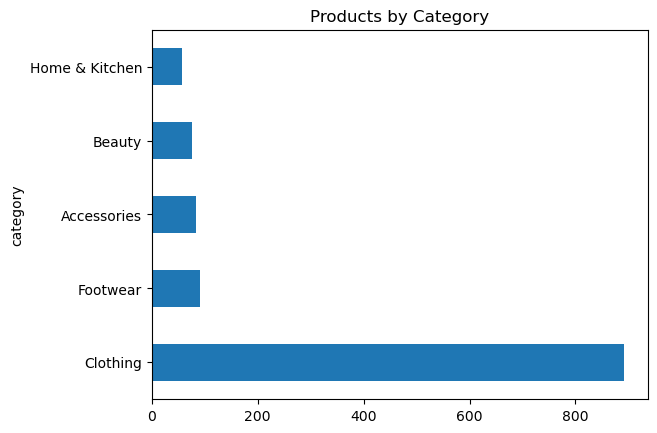

In [60]:
# Category count
df['category'].value_counts().plot(kind='barh', title="Products by Category")
plt.show()

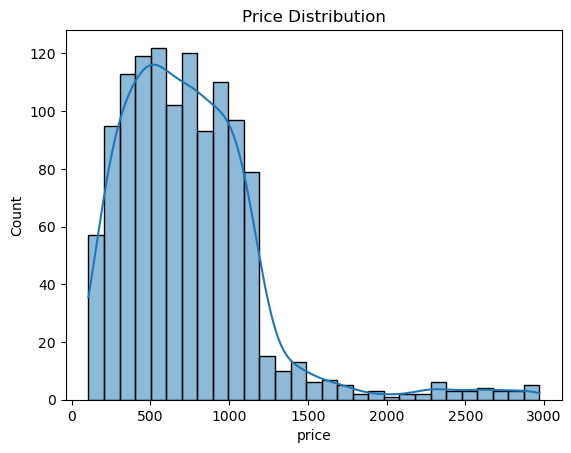

In [58]:
# Price distribution
sns.histplot(df['price'], kde=True)
plt.title("Price Distribution")
plt.show()


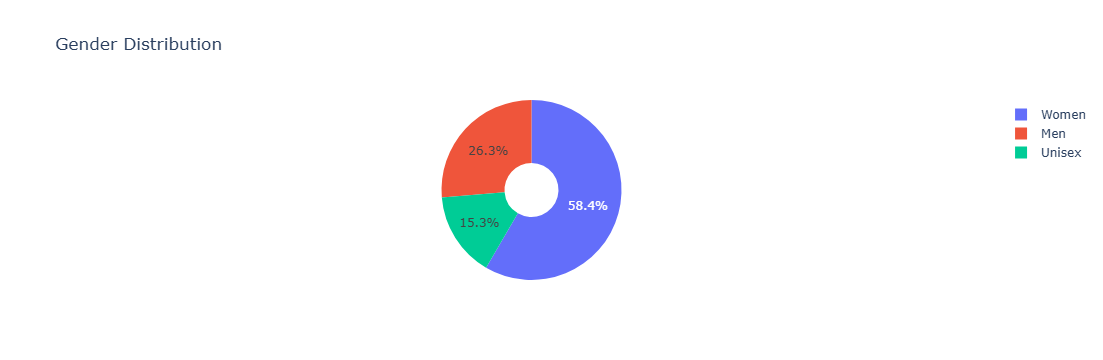

In [52]:
import plotly.express as px

Gender = df["gender"].value_counts()
fig = px.pie(
    names=Gender.index, 
    values=Gender.values, 
    title="Gender Distribution", 
    hole=0.3  # Donut-style pie chart
)

fig.show()


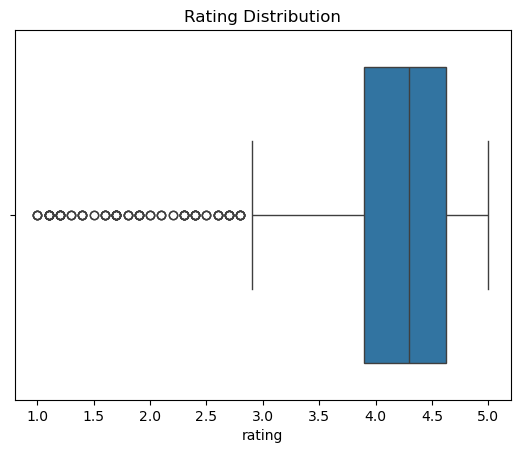

In [62]:
# Rating distribution
sns.boxplot(x='rating', data=df)
plt.title("Rating Distribution")
plt.show()


# Bivariate Analysis

In [71]:
print(df.columns.tolist())


['scrape_date', 'product_name', 'price', 'original_price', 'discount_percentage', 'category', 'rating', 'review_count', 'seller_name', 'gender', 'size', 'state', 'city', 'quantity', 'Date', 'year', 'month', 'discount_price']


In [73]:
df['total_price'] = df['price'] * df['quantity']


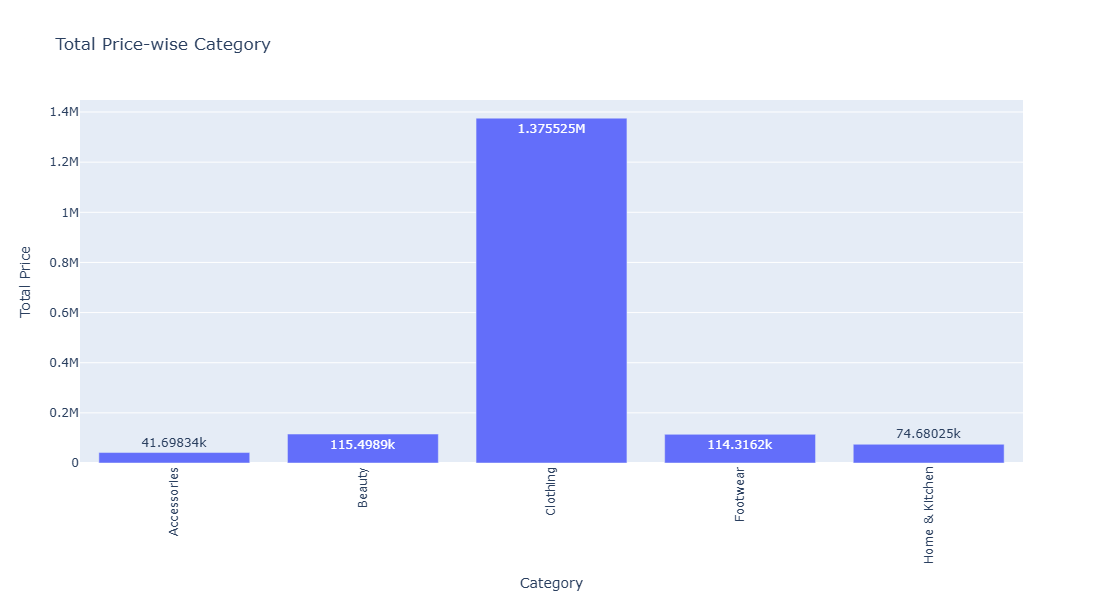

In [79]:
df_grouped = df.groupby('category', as_index=False)['total_price'].sum()
fig = px.bar(
    df_grouped, 
    x='category', 
    y='total_price',
    title="Total Price-wise Category",
    labels={'category': 'Category', 'total_price': 'Total Price'},
    width=1200, 
    height=600, 
    text_auto=True
)

fig.update_layout(xaxis_tickangle=-90)
fig.show()


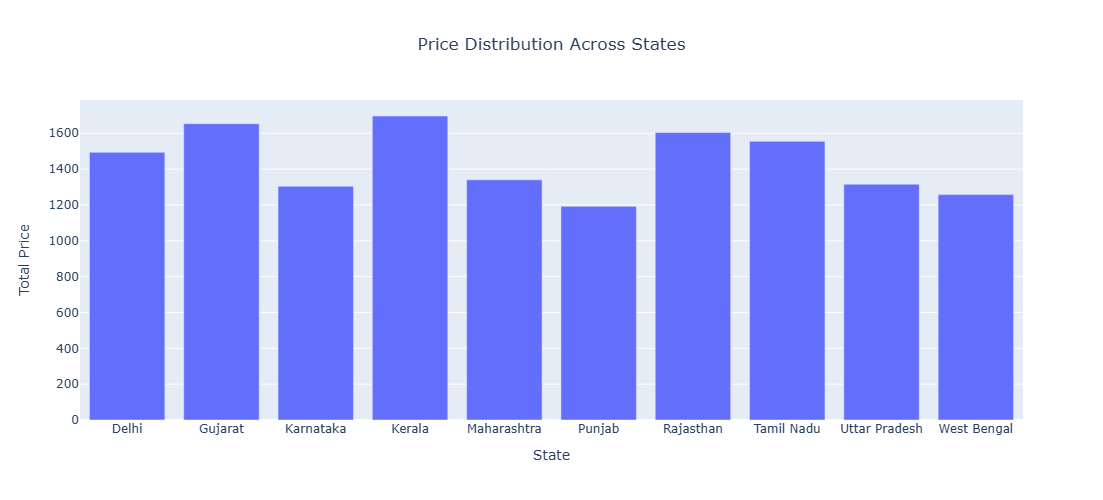

In [81]:
df1_grouped = df.groupby('state', as_index=False)['total_price'].mean()

fig = px.bar(
    df1_grouped,
    x='state',
    y='total_price',
    title='Price Distribution Across States'
)

fig.update_layout(
    xaxis_title='State',
    yaxis_title='Total Price',
    title_x=0.5,
    height=500,
    width=800
)

fig.show()


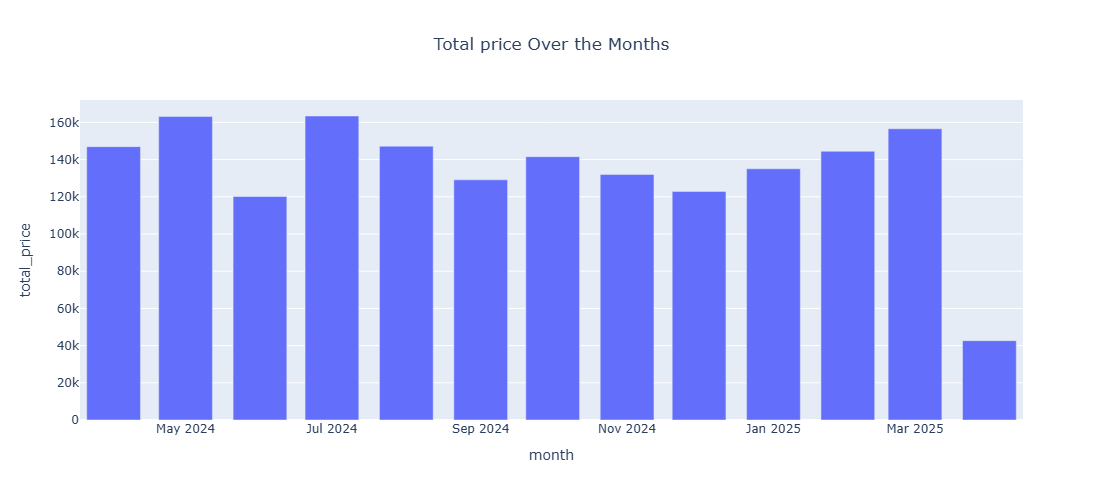

In [41]:
df2_grouped = df.groupby('month', as_index=False)['total_price'].sum().reset_index()
fig = px.bar(df2_grouped,
              x='month',
              y='total_price',
              title='Total price Over the Months',
              color_discrete_sequence=['#636EFA'])  # Optional: single custom color

fig.update_layout(xaxis_title='month',
                  yaxis_title='total_price',
                  title_x=0.5,
                  height=500,
                  width=800)

fig.show()


          category  gender  total_price
0      Accessories  Female   580.732308
1      Accessories    Male   550.801250
2      Accessories  Unisex   568.750000
3           Beauty  Female  1616.495385
4           Beauty    Male  1469.695429
5           Beauty  Unisex  1850.216000
6         Clothing  Female  1642.201685
7         Clothing    Male  1573.004410
8         Clothing  Unisex  1516.713636
9         Footwear  Female  1243.472903
10        Footwear    Male  1596.186176
11        Footwear  Unisex  1058.912857
12  Home & Kitchen  Female  1141.851500
13  Home & Kitchen    Male  1194.541290
14  Home & Kitchen  Unisex  1256.881481


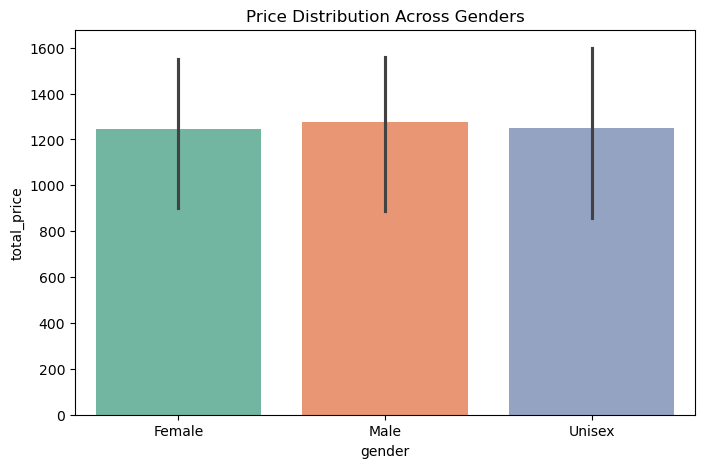

In [39]:
category_gender_avg_sales = df.groupby(['category', 'gender'])['total_price'].mean().reset_index()
print(category_gender_avg_sales)
plt.figure(figsize=(8, 5))
sns.barplot(x="gender", y="total_price", data=category_gender_avg_sales, palette="Set2")
plt.title("Price Distribution Across Genders")
plt.show()

# Multivariate Analysis

In [84]:
t=df[['original_price', 'discount_percentage', 'rating', 'review_count','quantity','price','total_price']]

,original_price,discount_percentage,rating,review_count,quantity,price,total_price
original_price,1.000000,0.464947,0.027402,0.043022,0.008412,0.833118,0.439653
discount_percentage,0.464947,1.000000,-0.000186,0.006201,-0.008924,0.011129,0.011712
rating,0.027402,-0.000186,1.000000,0.576684,-0.099208,0.032969,-0.071460
review_count,0.043022,0.006201,0.576684,1.000000,-0.074151,0.045547,-0.028864
quantity,0.008412,-0.008924,-0.099208,-0.074151,1.000000,-0.003640,0.753556
price,0.833118,0.011129,0.032969,0.045547,-0.003640,1.000000,0.508862
total_price,0.439653,0.011712,-0.071460,-0.028864,0.753556,0.508862,1.000000


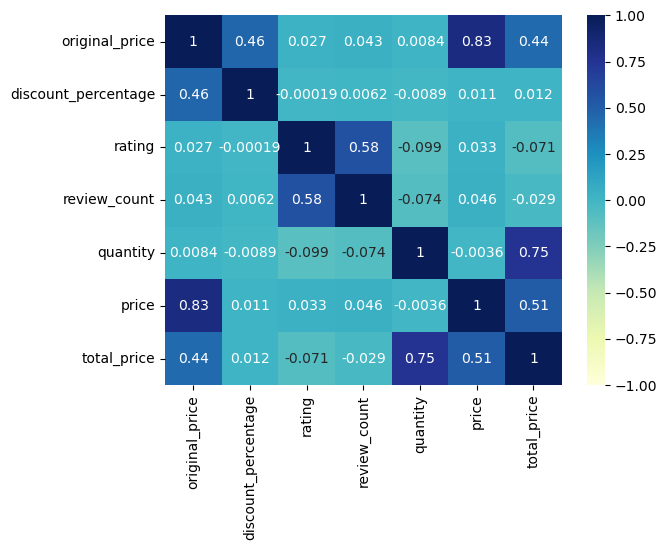

In [86]:
corr=t.corr()
sns.heatmap(corr,annot=True,vmax=1,vmin=-1,cmap="YlGnBu")
corr

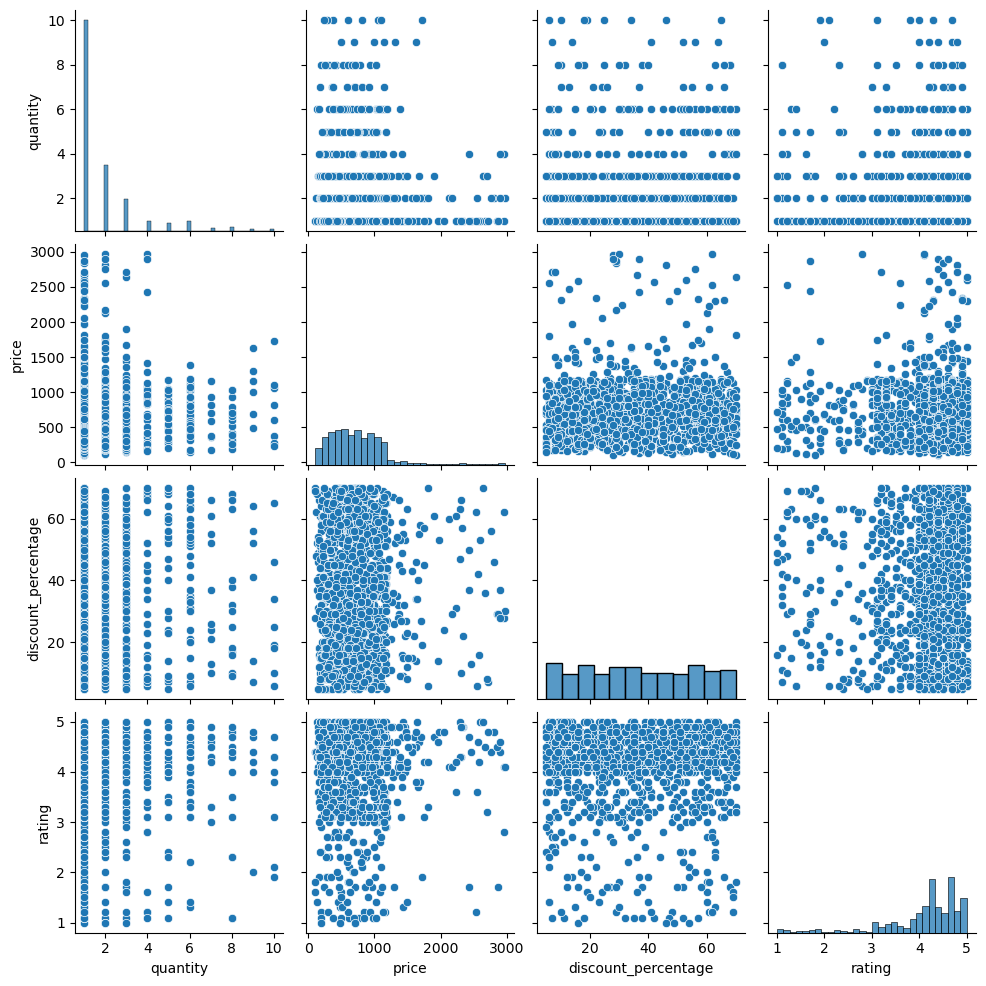

In [88]:
sns.pairplot(df[['quantity','price','discount_percentage', 'rating']],palette="coolwarm")
plt.show()

# Outliers

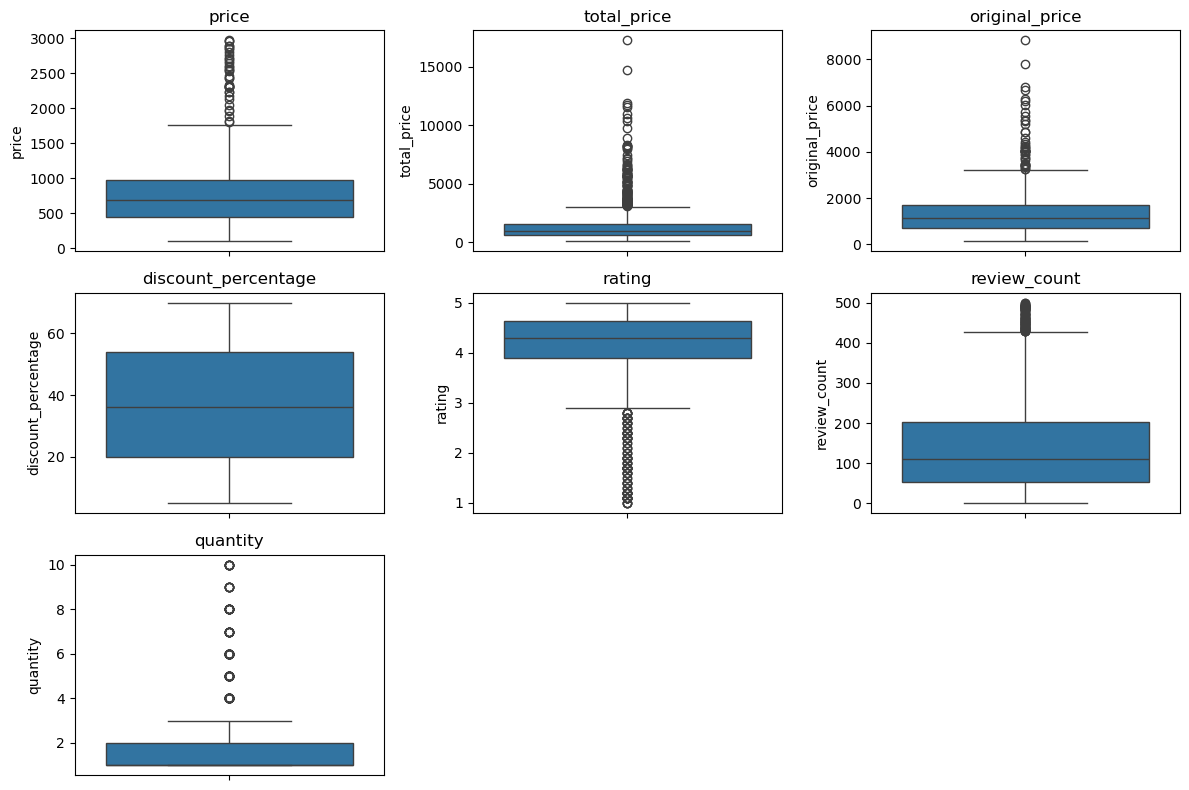

In [91]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Box Plots
sns.boxplot(y=df["price"], ax=axes[0, 0]).set(title="price")
sns.boxplot(y=df["total_price"], ax=axes[0, 1]).set(title="total_price")
sns.boxplot(y=df["original_price"], ax=axes[0, 2]).set(title="original_price")
sns.boxplot(y=df["discount_percentage"], ax=axes[1, 0]).set(title="discount_percentage")
sns.boxplot(y=df["rating"], ax=axes[1, 1]).set(title="rating")
sns.boxplot(y=df["review_count"], ax=axes[1, 2]).set(title="review_count")
sns.boxplot(y=df["quantity"], ax=axes[2, 0]).set(title="quantity")

# Remove empty subplots (if you only have 7 variables)
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Adjust Layout
plt.tight_layout()
plt.show()


# Scaling

In [94]:
# Select relevant numeric features for clustering
features = ["price", "original_price", "discount_percentage", "rating", "review_count", "quantity","total_price"]
K = df[features]

# Standardize the data
scaler = StandardScaler()
K_scaled = scaler.fit_transform(K)

# Unsupervised

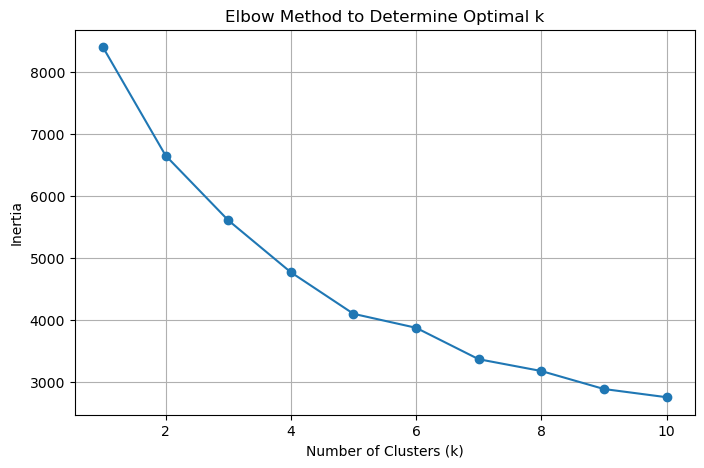

In [97]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(K_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

In [99]:
# Fit KMeans with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(K_scaled)

In [101]:
# View average values by cluster
cluster_summary = df.groupby('cluster')[features].mean().round(2)
print(cluster_summary)

# Count products in each cluster
print(df['cluster'].value_counts())

           price  original_price  discount_percentage  rating  review_count  \
cluster                                                                       
0         568.09          878.79                32.53    3.83         85.50   
1        1291.94         2705.71                50.82    4.13        126.49   
2         858.94         1493.53                36.27    3.75        114.00   
3         670.89         1139.15                36.34    4.73        349.28   

         quantity  total_price  
cluster                         
0            1.49       809.05  
1            1.47      1913.01  
2            6.22      5099.10  
3            1.52       980.94  
cluster
0    609
3    267
1    215
2    109
Name: count, dtype: int64


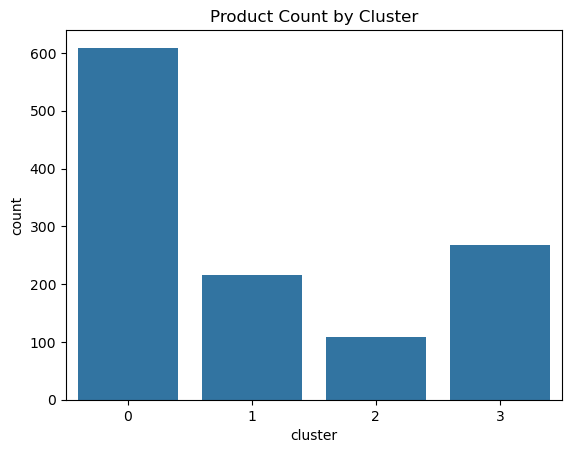

In [210]:
import seaborn as sns

sns.countplot(data=df, x='cluster')
plt.title("Product Count by Cluster")
plt.show()


# Supervised Learning

# Logistic Regression

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Step 1: Create a binary target column (without overwriting 'total_price')
threshold = df['total_price'].median()
df['high_price'] = df['total_price'].apply(lambda x: 1 if x > threshold else 0)

# Step 2: Define features (use column names instead of iloc for clarity)
features = ['price', 'original_price', 'discount_percentage', 'rating', 'review_count', 'quantity']
X = df[features]
y = df['high_price']

# Step 3: Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(x_test)

# Step 6: Evaluate
conf_mat = metrics.confusion_matrix(y_test, y_pred)
acc_score = metrics.accuracy_score(y_test, y_pred)

# Step 7: Print results
print("Confusion Matrix:\n", conf_mat)
print("Accuracy Score:", round(acc_score, 2))
print("Accuracy in Percentage:", int(acc_score * 100), '%')


Confusion Matrix:
 [[110   5]
 [  4 121]]
Accuracy Score: 0.96
Accuracy in Percentage: 96 %


# Decision Tree

In [142]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [144]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(960, 6)

(960,)

(240, 6)

(240,)

In [146]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('y_pred : ', y_pred)

y_pred :  [1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1
 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1
 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0
 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1]


In [148]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in percentage : ', int(Accuracy_score * 100),'%')

Confusion Matrix :  [[117   1]
 [  1 121]]
Accuracy Score :  0.9916666666666667
Accuracy in percentage :  99 %


# K Nearest Neighbour

In [151]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [153]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [155]:
results = []
for i in [1,2,3,4,5,6]:
    model = KNeighborsClassifier(n_neighbors=i,
metric='minkowski',p=2)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_score=metrics.accuracy_score(y_test,y_pred)
    results.append(accuracy_score)

print('KNN [minkowski]')
print('for n_neighbor=6 :')
conf_mat=metrics.confusion_matrix(y_test,y_pred)
print('\n Confusion Matrix :',conf_mat)
print('accuracy_score:',accuracy_score)
print('accuracy in percentage :',
int (accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))

print(results)

KNN [minkowski]
for n_neighbor=6 :

 Confusion Matrix : [[116   2]
 [ 25  97]]
accuracy_score: 0.8875
accuracy in percentage : 88 %

               precision    recall  f1-score   support

           0       0.98      0.82      0.90       141
           1       0.80      0.98      0.88        99

    accuracy                           0.89       240
   macro avg       0.89      0.90      0.89       240
weighted avg       0.91      0.89      0.89       240

[0.9375, 0.8916666666666667, 0.9125, 0.9041666666666667, 0.925, 0.8875]


In [157]:
results = []
for i in [1,2,3,4,5,6]:
    model = KNeighborsClassifier(n_neighbors=i,
metric='manhattan',p=2)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_score=metrics.accuracy_score(y_test,y_pred)
    results.append(accuracy_score)

print('KNN [manhattan]')
print('for n_neighbor=6 :')
conf_mat=metrics.confusion_matrix(y_test,y_pred)
print('\n Confusion Matrix :',conf_mat)
print('accuracy_score:',accuracy_score)
print('accuracy in percentage :',
int (accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))

print(results)

KNN [manhattan]
for n_neighbor=6 :

 Confusion Matrix : [[118   0]
 [ 26  96]]
accuracy_score: 0.8916666666666667
accuracy in percentage : 89 %

               precision    recall  f1-score   support

           0       1.00      0.82      0.90       144
           1       0.79      1.00      0.88        96

    accuracy                           0.89       240
   macro avg       0.89      0.91      0.89       240
weighted avg       0.91      0.89      0.89       240

[0.9208333333333333, 0.8916666666666667, 0.9208333333333333, 0.8916666666666667, 0.9125, 0.8916666666666667]


In [159]:
results = []
for i in [1,2,3,4,5,6]:
    model = KNeighborsClassifier(n_neighbors=i,
metric='euclidean',p=2)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_score=metrics.accuracy_score(y_test,y_pred)
    results.append(accuracy_score)

print('KNN [euclidean]')
print('for n_neighbor=6 :')
conf_mat=metrics.confusion_matrix(y_test,y_pred)
print('\n Confusion Matrix :',conf_mat)
print('accuracy_score:',accuracy_score)
print('accuracy in percentage :',
int (accuracy_score*100),'%')
print('\n',classification_report(y_pred,y_test))

print(results)

KNN [euclidean]
for n_neighbor=6 :

 Confusion Matrix : [[116   2]
 [ 25  97]]
accuracy_score: 0.8875
accuracy in percentage : 88 %

               precision    recall  f1-score   support

           0       0.98      0.82      0.90       141
           1       0.80      0.98      0.88        99

    accuracy                           0.89       240
   macro avg       0.89      0.90      0.89       240
weighted avg       0.91      0.89      0.89       240

[0.9375, 0.8916666666666667, 0.9125, 0.9041666666666667, 0.925, 0.8875]


# Random Forest

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [166]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [168]:
model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [170]:
print('Random Forest Classifier')
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('\n Confusion Matrix : \n', conf_mat)
Accuracy_score = accuracy_score(y_test, y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage :', int(Accuracy_score * 100),'%')
print('\n', classification_report(y_pred, y_test))

Random Forest Classifier

 Confusion Matrix : 
 [[173   1]
 [ 10 176]]
Accuracy Score :  0.9694444444444444
Accuracy in Percentage : 96 %

               precision    recall  f1-score   support

           0       0.99      0.95      0.97       183
           1       0.95      0.99      0.97       177

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



# Support Vector Machine (SVM)

In [173]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [175]:
model = SVC(kernel = 'rbf', random_state = 0)
model.fit(x_train, y_train)
svc_prediction = model.predict(x_test)
print('svc_prediction : ', svc_prediction)

svc_prediction :  [1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0
 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0]


In [177]:
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [kernerl - rbf]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage :', int(Accuracy_score * 100),'%')
print('\n', classification_report(svc_prediction, y_test))

SVC [kernerl - rbf]
Confusion Matrix : 
 [[167   7]
 [ 11 175]]
Accuracy Score :  0.95
Accuracy in Percentage : 95 %

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       178
           1       0.94      0.96      0.95       182

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [179]:
model = SVC(kernel = 'linear', random_state = 0)
model.fit(x_train, y_train)
svc_prediction = model.predict(x_test)
print('svc_prediction : ', svc_prediction)

svc_prediction :  [1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0
 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0
 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 1 0
 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1
 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0]


In [181]:
conf_mat = metrics.confusion_matrix(y_test, svc_prediction)
print('SVC [kernerl - linear]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage :', int(Accuracy_score * 100),'%')
print('\n', classification_report(svc_prediction, y_test))

SVC [kernerl - linear]
Confusion Matrix : 
 [[168   6]
 [  8 178]]
Accuracy Score :  0.9611111111111111
Accuracy in Percentage : 96 %

               precision    recall  f1-score   support

           0       0.97      0.95      0.96       176
           1       0.96      0.97      0.96       184

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



# XG Boost

In [184]:
import xgboost as xgb

In [186]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f"x-train : {x_train.shape} \nx-test : {x_test.shape} \ny-train : {y_train.shape} \ny-test : {y_test.shape}")

x-train : (960, 6) 
x-test : (240, 6) 
y-train : (960,) 
y-test : (240,)


In [188]:
x_label, y_label = x_train[:349],y_train[:349]
x_unlabelled = x_train[349:]
print(f"x-label : {x_label.shape} \n y_label ; {y_label.shape} \n x-unlabelled : {x_unlabelled.shape}")

x-label : (349, 6) 
 y_label ; (349,) 
 x-unlabelled : (611, 6)


In [190]:
n_classes = len(y_label.unique())

In [192]:
model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=n_classes,  # FIXED: Now dynamically set
    random_state=42
)

In [200]:
model.fit(x_label, y_label)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=2, ...)

In [202]:
while True:
    # Predict probabilities on unlabeled data
    y_pred_proba = model.predict_proba(x_unlabelled)

    # Find samples with high-confidence predictions (>90%)
    index = [i for i, x in enumerate(np.max(y_pred_proba, axis=1)) if x > 0.90]

    # If no high-confidence predictions, stop training
    if len(index) == 0:
        break

    # Select confident predictions
    confident_x = x_unlabelled.iloc[index]
    confident_y = model.predict(confident_x)  # Predicted labels

    # Remove added samples from x_unlabelled **(Fixed Drop Method)**
    x_unlabelled = x_unlabelled.drop(x_unlabelled.index[index]).reset_index(drop=True)

    # Add confident samples to training set
    x_label = pd.concat([x_label, confident_x], ignore_index=True)
    y_label = pd.concat([y_label, pd.Series(confident_y, index=confident_x.index)], ignore_index=True)

# Train final model on updated labeled data
model.fit(x_label, y_label)

# Predict on test data
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 98.75%


In [204]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pandas as pd

# Define a function to evaluate models
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    return [accuracy, precision, recall, f1]

# Initialize a dictionary to store results
model_performance = {}

# Logistic regression
LG = LogisticRegression(random_state = 42)
LG.fit(x_train, y_train)
model_performance["LogisticRegression"] = evaluate_model(LG, x_test, y_test)
# Evaluate KNN (Manhattan)
knn_manhattan = KNeighborsClassifier(n_neighbors=6, metric='manhattan', p=2)
knn_manhattan.fit(x_train, y_train)
model_performance["KNN (Manhattan)"] = evaluate_model(knn_manhattan, x_test, y_test)

# Evaluate KNN (Euclidean)
knn_euclidean = KNeighborsClassifier(n_neighbors=6, metric='euclidean', p=2)
knn_euclidean.fit(x_train, y_train)
model_performance["KNN (Euclidean)"] = evaluate_model(knn_euclidean, x_test, y_test)

# Evaluate Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
model_performance["Decision Tree"] = evaluate_model(dt, x_test, y_test)

# Evaluate Random Forest
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(x_train, y_train)
model_performance["Random Forest"] = evaluate_model(rf, x_test, y_test)

# Evaluate Support Vector Classifier (SVC)
svc = SVC(kernel='rbf', probability=True, random_state=42)
svc.fit(x_train, y_train)
model_performance["SVC"] = evaluate_model(svc, x_test, y_test)

# Evaluate XGBoost
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
model_performance["XGBoost"] = evaluate_model(xgb, x_test, y_test)

# Convert results into a DataFrame
performance_df = pd.DataFrame(model_performance, index=["Accuracy", "Precision", "Recall", "F1-score"]).T

# Display the table
print(performance_df)

                    Accuracy  Precision    Recall  F1-score
LogisticRegression  0.962500   0.962519  0.962500  0.962493
KNN (Manhattan)     0.816667   0.842532  0.816667  0.814407
KNN (Euclidean)     0.816667   0.839353  0.816667  0.814744
Decision Tree       0.991667   0.991667  0.991667  0.991667
Random Forest       0.987500   0.987818  0.987500  0.987505
SVC                 0.808333   0.818386  0.808333  0.807667
XGBoost             0.991667   0.991667  0.991667  0.991667


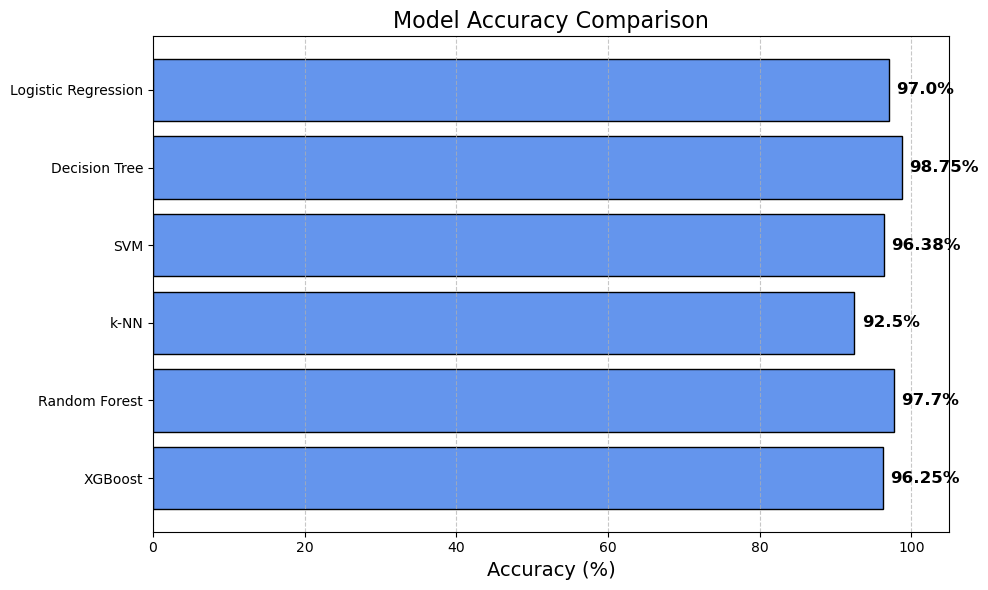

In [208]:
import matplotlib.pyplot as plt

# Model names and their accuracies
model_names = ['Logistic Regression', 'Decision Tree', 'SVM', 'k-NN', 'Random Forest', 'XGBoost']
accuracy_scores = [0.97, 0.9875, 0.9638, 0.925, 0.977, 0.9625]  # Example values
accuracy_percentages = [round(score * 100, 2) for score in accuracy_scores]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(model_names, accuracy_percentages, color='cornflowerblue', edgecolor='black')

# Add value labels next to the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width}%', va='center', fontsize=12, fontweight='bold')

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.xlim(0, 105)
plt.gca().invert_yaxis()  # Highest accuracy on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
